In [26]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import prepState
from numpy import linalg as LA
from numpy import log as ln
from timeEvo import *
#from generateStates import *
from qutip import *


# for using tex formatting and font in plots
#"""
plt.rcParams.update({"text.usetex": True,}) 
mpl.rcParams['text.latex.preamble'] = [r'\usepackage[utf8]{inputenc}\usepackage[T1]{fontenc}\usepackage{lmodern}\inputencoding{utf8}\usepackage{amsmath}\usepackage{amssymb}\usepackage{dsfont}\usepackage{mathtools}\usepackage{physics}']
mpl.rc('font', **{'family':'sans-serif', 'size':11})
cmap = mpl.cm.get_cmap('viridis')#['viridis', 'plasma', 'inferno', 'magma', 'cividis']

In [27]:
## load quanitites

newbound_infos = []
newbound_bounds = []

newbound_bounds.append(np.loadtxt("txtfiles/newbound/newbound/12_corr_beta1=beta2_simpler.txt"))
newbound_bounds.append(np.loadtxt("txtfiles/newbound/newbound/12_corr_beta1=beta2_newbound.txt"))
newbound_infos.append(np.loadtxt("txtfiles/newbound/newbound/12_corr_beta1=beta2_info.txt"))


corr_12_fid         = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/12_fidelity.txt")
corr_12_dkl         = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/12_kld.txt")
corr_12_infoflow    = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/12_infoflow.txt")
corr_12_pendrybound = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/12_pendry.txt")

corr_23_fid         = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/23_fidelity.txt")
corr_23_dkl         = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/23_kld.txt")
corr_23_infoflow    = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/23_infoflow.txt")
corr_23_pendrybound = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/23_pendry.txt")

corr_34_fid         = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/34_fidelity.txt")
corr_34_dkl         = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/34_kld.txt")
corr_34_infoflow    = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/34_infoflow.txt")
corr_34_pendrybound = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/34_pendry.txt")

corr_45_fid         = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/45_fidelity.txt")
corr_45_dkl         = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/45_kld.txt")
corr_45_infoflow    = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/45_infoflow.txt")
corr_45_pendrybound = np.loadtxt("txtfiles/corr_at_diff_pos-new-alpha/45_pendry.txt")

hom_kld = np.loadtxt("txtfiles/j_const/dkl.txt")[:1850]
hom_fid = np.loadtxt("txtfiles/j_const/fidelity.txt")[:1850]

perf_kld = np.loadtxt("txtfiles/j_var/dkl.txt")
perf_fid = np.loadtxt("txtfiles/j_var/fidelity.txt")

long_kld = np.loadtxt("txtfiles/longrange/kld.txt")
long_fid = np.loadtxt("txtfiles/longrange/fidelity.txt")
long_inf = np.loadtxt("txtfiles/longrange/infoflow.txt")
long_pen = np.loadtxt("txtfiles/longrange/pendrybound.txt")
long_max = np.loadtxt("txtfiles/longrange/maxfid.txt")

long_list = [long_kld, long_fid, long_inf, long_pen, long_max]

i_dot_sq_max_alpha  = np.loadtxt("txtfiles/i_dot_sq_max/maxima.txt", usecols=0)
fid_max_alpha       = np.loadtxt("txtfiles/i_dot_sq_max/maxima.txt", usecols=1)
bound_diff_max      = np.loadtxt("txtfiles/i_dot_sq_max/maxima.txt", usecols=2)
alpha               = np.loadtxt("txtfiles/i_dot_sq_max/maxima.txt", usecols=3)

maxima = [i_dot_sq_max_alpha, fid_max_alpha*1e-3, np.abs(bound_diff_max), alpha]

fidelities = [corr_12_fid, corr_23_fid, corr_34_fid, corr_45_fid]
dkls = [corr_12_dkl, corr_23_dkl, corr_34_dkl, corr_45_dkl]
#
infoflows = [corr_12_infoflow, corr_23_infoflow, corr_34_infoflow, corr_45_infoflow]
bounds = [corr_12_pendrybound, corr_23_pendrybound, corr_34_pendrybound, corr_45_pendrybound]

maxima_diff_beta = [[],[],[],[],[],[],[]]
#beta_ratio = [[],[],[],[],[]]


for j in range(0,6):
    for i in range(4):
        maxima_diff_beta[j].append(np.loadtxt("txtfiles/i_dot_sq_max/diff_beta/maxima_with_diff_beta0"+str(j)+".txt", skiprows=1, usecols=i))
#beta_ratio.append(np.round(1e4*np.loadtxt("txtfiles/i_dot_sq_max/old_files/maxima_with_diff_beta"+str(k)+str(j)+".txt", usecols=-2)[0]/np.loadtxt("txtfiles/i_dot_sq_max/old_files/maxima_with_diff_beta"+str(k)+str(j)+".txt", usecols=-1)[0])/10000)

n = 3199
dt = 1e-3
t = np.linspace(0, n*dt, n)
cm = 1/2.54

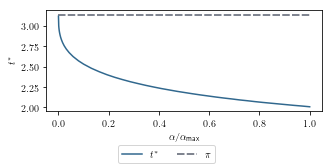

In [28]:
from scipy.optimize import curve_fit


def f(x,a):
    return a*x


def alpha(beta_one, beta_two):
    return 1/(4*np.cosh(beta_one)*np.cosh(beta_two))


n=1
labels = [r"$\dot{I}^2_\text{max}$", r"$t^*$", r"$\mathcal{V}_\text{max}$", r"$\alpha/\alpha_\text{max}$"]
betalabel = [r"$\beta_2=\frac{1}{300}$",r"$\beta_2=\frac{1}{4}$",r"$\beta_2=\frac{1}{2}$",r"$\beta_2=\frac{3}{4}$",r"$\beta_2=\frac{5}{4}$",r"$\beta_2=10$"]
betas = [1/300, .25, .5, .75, 1.21, 10]

cm=1/2.54

fig, ax = plt.subplots(figsize=(12*cm,6*cm))
poptlist, pcovlist = [], []
i=0
#ax.plot(maxima_diff_beta[i][-1], maxima_diff_beta[i][n], label=betalabel[0], color=cmap(4/7 + (i-1.5)/7))
for j in [0]:
    alpha_ratio = maxima_diff_beta[j][3]
    fid_dings = maxima_diff_beta[j][n]
    ax.plot(alpha_ratio, fid_dings*1e-3, label=labels[1], color=cmap(4/12 + (i)/7), zorder=(6-j))
    #popt, pcov = curve_fit(f, maxima_diff_beta[j][3], fid_dings)
    #ax.plot(alpha_ratio, f(alpha_ratio, *popt), color = mpl.cm.get_cmap('magma')(8/12-i/7), ls=':', alpha=1, lw=1.2, zorder=20)
    #poptlist.append(popt)
    #pcovlist.append(np.sqrt(np.diag(pcov)))
    #print(popt[0]*alpha(betas[0], betas[i]),alpha(betas[0], betas[i]))
    i+=1
#ax.plot(maxima_diff_beta[i][3], np.ones(46)*(np.pi-0.00459), label=r"$\pi$", color = mpl.cm.get_cmap('cividis')(1/3), ls=(0,(5,1.5)), alpha=1, lw=1.5, zorder=1)
#popt, pcov = curve_fit(f, maxima_diff_beta[i][3], maxima_diff_beta[i][n])
##ax.plot(alpha_ratio, f(alpha_ratio, *popt), color = mpl.cm.get_cmap('magma')(8/12-i/7), ls=':', alpha=1, lw=1.2, zorder=20)
#poptlist.append(popt)
#pcovlist.append(np.sqrt(np.diag(pcov)))
#print(popt[0]*alpha(betas[0], betas[i]), alpha(betas[0], betas[i]))
#ax.axhline((np.pi-0.00459), color=cmap((j+1)/6), ls=':', lw=1)
#ax.plot(maxima[-1], maxima[n], label=labels[n], color=cmap(1/10))
ax.set_ylabel(labels[n])
ax.set_xlabel(labels[-1])
fig.tight_layout()
fig.subplots_adjust(bottom=.32)
#print(poptlist)
#print(pcovlist)
fig.legend(loc=8, ncol=3)
plt.savefig("alltheplots/maxima/pos_of_first_fid_max_usethis.pdf")

[0.50000011 5.00000274] [[4.59064496e-16 1.22055996e-14]
 [1.22055996e-14 4.37424052e-13]]


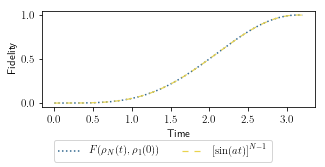

In [23]:
#t = np.linspace(0,1.85,1850)
from scipy.optimize import curve_fit


def f(x,a,N):
    return np.sin(a*x)**(N-1)


t=np.linspace(0,3.2,3200)

popt, pcov = curve_fit(f, t, perf_fid, p0=(.5,5))

print(popt, pcov)

i=0
pos=3
corr_dkl = dkls[i]
i+=1

fig, ax = plt.subplots(sharex=True,figsize=(12*cm,6*cm))

ax.plot(t, perf_fid, label=r"$F(\rho_N(t), \rho_1(0))$", color=cmap(1/3), ls=':')
ax.plot(t, f(t, *popt), label=r"$\left[\sin(at)\right]^{N-1}$", color = mpl.cm.get_cmap('cividis')(11/12),ls=(0,(5,5)), alpha=1, lw=1.2, zorder=20)
#ax1.plot(t, long_kld[:4800], label=r"$S(\rho_1(0)\mid\mid\rho_N(t))$", color=cmap(2/3))
ax.set_ylabel(r'Fidelity')
ax.set_xlabel(r'Time')
fig.legend(loc=8, ncol=2)
fig.tight_layout()
fig.subplots_adjust(bottom=.34)
plt.savefig("alltheplots/ten/app_fidelity_with_fit.pdf")

3.6803521416075903e-07+3.332820257210774e-07
0.3913766117072814+1.6481809655493635e-07 0.39137390695952523


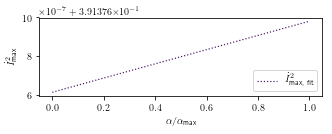

In [9]:
from scipy.optimize import curve_fit


def f(x,a,b):
    return a*x+b


n=1
labels = [r"$\dot{I}^2_\text{max}$", r"$t^*$", r"$\mathcal{V}_\text{max}$", r"$\alpha/\alpha_\text{max}$"]
betalabel = [r"$\beta_2=\frac{1}{300}$",r"$\beta_2=\frac{1}{4}$",r"$\beta_2=\frac{1}{2}$",r"$\beta_2=\frac{3}{4}$",r"$\beta_2=\frac{5}{4}$",r"$\beta_2=10$"]

j=5
popt, pcov = curve_fit(f, maxima_diff_beta[j][3], maxima_diff_beta[j][n], p0=[0,.43708])
alphamax = 1/(4*np.cosh(1/300)*np.cosh(10))
perr = np.sqrt(np.diag(pcov))

print(str(popt[0])+'+'+str(perr[0]))
print(str(popt[1])+'+'+str(perr[1]), maxima_diff_beta[j][0][0])
cm=1/2.54

fig, ax = plt.subplots(figsize=(12*cm,5*cm))


#ax.plot(maxima_diff_beta[i][-1], maxima_diff_beta[i][n], label=betalabel[0], color=cmap(4/7 + (i-1.5)/7))

alpha_ratio = maxima_diff_beta[j][3]
fid_dings = 1*maxima_diff_beta[j][n]
#ax.plot(alpha_ratio, fid_dings, label=labels[n], color=cmap(1/3), zorder=(6-j), lw=1.2)
fid_dings = maxima_diff_beta[j][n]
ax.plot(alpha_ratio, f(alpha_ratio, *popt), label=r'$\dot{I}^2_\text{max, fit}$', color = cmap(1/18), ls=':', alpha=1, lw=1.2, zorder=10)
#ax.plot(alpha_ratio, fid_dings[0]+fid_dings-fid_dings, label=r"$\eval{\dot{I}^2_\text{max}}_{\alpha=0}$", color = mpl.cm.get_cmap('cividis')(1/3), ls=(0,(5,1.5)), alpha=1, lw=1, zorder=1)
#ax.axhline(fid_dings[0], color = mpl.cm.get_cmap('cividis')(1/3), ls=(0,(5,1.5)), alpha=1, lw=1, zorder=1)
#ax.plot(maxima[-1], maxima[n], label=labels[n], color=cmap(1/10))
ax.set_ylabel(labels[n])
ax.set_xlabel(labels[-1])
ax.legend(loc='lower right')#, ncol=3)
fig.tight_layout()
#fig.subplots_adjust(right=.76)
#plt.savefig("alltheplots/maxima/max_i_dot_sq_linear_fit.pdf")

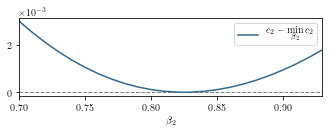

In [23]:
## lowest maximum information flow

i_dot_sq_of_zero = np.loadtxt("txtfiles/i_dot_sq_max/diff_beta/which_beta/uncorr.txt", usecols=0, skiprows=1)
beta_2           = np.loadtxt("txtfiles/i_dot_sq_max/diff_beta/which_beta/uncorr.txt", usecols=3, skiprows=1)
cm=1/2.54
fig, ax = plt.subplots(figsize=(12*cm,5*cm))
#
ax.axhline(0, color='grey', ls='--', lw=1)
ax.plot(beta_2, i_dot_sq_of_zero - np.min(i_dot_sq_of_zero), label = r"$\displaystyle c_2 - \min_{\beta_2}{c_2}$", color=cmap(1/3))
ax.set_xlabel(r"$\beta_2$")
#ax.set_ylabel(r"$\displaystyle c_2 - \min_{\beta_2}{c_2}$")
ax.set_xlim(.7, .93)
#ax.set_yticks([0, .001, .002, 0.003])
ax.ticklabel_format(axis='y', style='sci', scilimits=(1,2))
#ax.set_yticklabels([r"$0$",r"$1\cdot10^{-3}$",r"$2\cdot10^{-3}$",r"$3\cdot10^{-3}$"])
#ax.set_yscale('log')
ax.legend(loc='best')#, ncol=3)
fig.tight_layout()
plt.savefig("alltheplots/maxima/min_of_i_dot_sq_max.pdf")

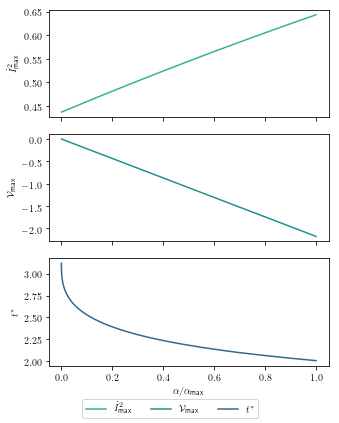

In [11]:
n=0
labels = [r"$t^*$", r"$\dot{I}^2_\text{max}$", r"$\mathcal{V}_\text{max}$", r"$\alpha/\alpha_\text{max}$"]
#betalabel = r'$\Delta\beta ='
#i=0
#fig, ax = plt.subplots(figsize=(12*cm,5*cm))
#for k in [0,1]:
#    for j in range(1,5):
#        alpha = maxima_diff_beta[k][j][3]
#        fid_dings = maxima_diff_beta[k][j][1]
#        ax.plot(alpha, fid_dings*1e-3, label=str(i), color=cmap((i+2)/(4*2)))
#        i+=1
#        #ax.axhline(maxima_diff_beta[j][1][-1], color=cmap((j+1)/6), ls=':', lw=1)
#ax.plot(maxima[-1], maxima[n], label=labels[n], color=cmap(1/10))
#ax.set_ylabel(labels[n])
#ax.set_xlabel(labels[-1])
#ax.legend(loc='best')

#n+=1
fig, (ax1,ax2,ax0) = plt.subplots(3,sharex=True, figsize=(12*cm,15*cm))

alpha = maxima[3]
#plt.savefig("alltheplots/maxima/pos_of_first_fid_max.pdf")
n+=1

#fig, ax = plt.subplots(figsize=(12*cm,5*cm))

steigung = np.diff(maxima[n])/np.diff(alpha)
fitlabel = r'$\partial_\alpha \eval{\dot{I}^2_\text{max}}_{\alpha = 0} \cdot \alpha/\alpha_\text{max} + \eval{\dot{I}^2_\text{max}}_{\alpha = 0}$'
x=np.linspace(0,1,30)

ax1.plot(alpha, maxima[n], label=labels[n], color=cmap((4)/(6)))
#ax1.plot(x, steigung[0]*x+maxima[n][0], color=cmap(1/6), label=fitlabel, ls=':', lw=1)
#ax.legend(loc=8, ncol=2)
#fig.subplots_adjust(bottom=.35)
ax1.set_ylabel(labels[n])
#ax1.set_xlabel(labels[-1])
#plt.savefig("alltheplots/maxima/height_of_i_dot_sq_max.pdf")

n+=1
#fig, ax = plt.subplots(figsize=(12*cm,5*cm))
steigung = -1*np.diff(maxima[n])/np.diff(alpha)

ax2.plot(alpha, -1*maxima[n], label=labels[n], color=cmap((3)/(6)))
#ax2.plot(x, steigung[0]*x+maxima[n][0], color=cmap(1/6), label=fitlabel, ls=':', lw=1)
#ax.legend(loc='best')
ax2.set_ylabel(labels[2])
#ax2.set_xlabel(labels[-1])

n=1

ax0.plot(alpha, maxima[n], label=labels[n], color=cmap((2)/(6)))
#ax.legend(loc='best')
ax0.set_ylabel(labels[n])
ax0.set_xlabel(labels[-1])

fig.legend(loc=8,ncol=3)
fig.tight_layout()
fig.subplots_adjust(bottom=.13)

plt.savefig("alltheplots/maxima/allofthem_beta1=beta2.pdf")
##ax.plot(maxima[-1], maxima[n], label=labels[n], color=cmap(1/6))
#ax.set_xlabel(labels[-1])
#ax.legend(loc='best')
##fig, ax0 = plt.subplots(figsize=(12*cm,5*cm))
##ax0.plot(alpha, maxima[n], label=labels[n], color=cmap(1/3))
##ax0.set_ylabel(labels[n])
##ax0.axvline(0, color='grey', ls=':')
##ax0.axhline(maxima[n][-1], color='grey', ls='--', lw=1)
#ax0.legend(loc='best')
#ax0.set_xlabel(labels[-1])
#plt.savefig("alltheplots/alpha/time_of_max_fid_beta1=beta2>>1.pdf")
#n+=2
#fig, ax0 = plt.subplots(figsize=(12*cm,7*cm))
#ax0.plot(alpha, maxima[n], label=labels[n], color=cmap(.2))
#ax0.set_xlim(-.05,1.05)
##a01.axvline(0, color='grey', ls=':')
##a01.axhline(maxima[n][-1], color='grey', ls='--')
#n-=1
#ax0.plot(alpha, maxima[n], label=labels[n], color=cmap(2/3))
#ax0.axvline(0, color='grey', ls='--')
#ax0.set_xlabel(labels[-1])
#ax0.axhline(0, color='grey', ls=':')
#fig.legend(loc=8, ncol=2)
#fig.subplots_adjust(bottom=.35)

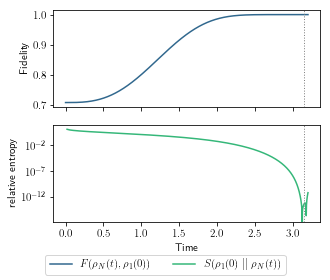

In [34]:
folder = "bell"
bell_fid = np.loadtxt("txtfiles/bell/fidelity.txt")[:3200]
with open("txtfiles/bell/kullback-unfailed.npy", 'rb') as f:
    bell_kld = np.load(f)
#t = np.linspace(0,1.85,1850)
i=0
pos="unfailed_greyline"
i+=1
t=np.linspace(0,3.2,3200)
cm=1/2.54
fig, (ax, ax1) = plt.subplots(2,sharex=True,figsize=(12*cm,10*cm))

ax.axvline(np.pi,color='grey', linewidth=1, ls=':')
ax1.axvline(np.pi,color='grey', linewidth=1, ls=':')
ax.plot(t, bell_fid, label=r"$F(\rho_N(t), \rho_1(0))$", color=cmap(1/3))
t=np.linspace(0,3.2,3201)
ax1.plot(t, bell_kld, label=r"$S(\rho_1(0)\mid\mid\rho_N(t))$", color=cmap(2/3))
ax1.set_yscale('log')
ax1.set_xlabel(r'Time')
ax.set_ylabel(r'Fidelity')
ax1.set_ylabel(r'relative entropy')
#ax1.set_yticks([10, 1, .1])
#ax.set_yscale('log')

#ax.axhline(0,color='grey', linewidth=1)
fig.legend(loc=8, ncol=2)
fig.tight_layout()
fig.subplots_adjust(bottom=.2)
#plt.savefig("alltheplots/"+folder+"/"+str(pos)+"_fidelity_kld.pdf")

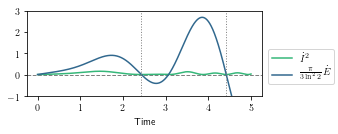

In [7]:
t=np.linspace(0,5,5000)

cm=1/2.54
fig, axs1= plt.subplots(figsize=(12*cm,5*cm))
axs1.axhline(0, color="grey", ls='--', linewidth=1)
axs1.plot(t[:-1], long_inf, label=r"$\dot{I}^2$", color=cmap(2/3), ls='-')
axs1.plot(t, long_pen, label=r"$\frac{\pi}{3\ln^22}\dot{E}$", color=cmap(1/3), ls='-')
#axs1.plot(t, bounds[0], label=r"old bound", color = mpl.cm.get_cmap('cividis')(1/3), ls=(0,(5,1.5)), lw=1)
axs1.axvline(2.428, color='grey', ls=':', linewidth=1)
axs1.axvline(4.42, color='grey', ls=':', linewidth=1)
axs1.set_ylim(-1,3)
#axs1.set_xlim(2.5, 2.65)
axs1.set_xlabel(r'Time')
#axs1.set_xlim()
fig.legend(loc=7)
fig.tight_layout()
fig.subplots_adjust(right=.78)

#plt.savefig("alltheplots/longrange/4_pendry_grey_lines.pdf")

#plt.show()

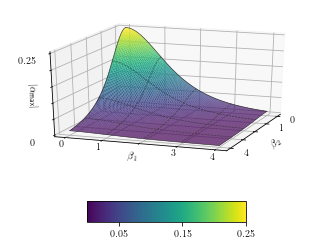

In [236]:
## surface plot
cm=1/2.54
from mpl_toolkits.mplot3d import Axes3D
from numpy import nan


def f(beta_one, beta_two):
    return 1/(4*np.cosh(beta_one)*np.cosh(beta_two))


fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12*cm,9*cm))

# Make data.
beta_one = np.linspace(0, 4, 500)
beta_two = np.linspace(0, 4, 500)
beta_one, beta_two = np.meshgrid(beta_one, beta_two)
#R = np.sqrt(X**2 + Y**2)
alpha = f(beta_one, beta_two)

xx = np.zeros(200)
zz = np.ones(200)*2
yy = np.linspace(0,4,200)

#xx, yy = np.meshgrid(xx, yy)

alpha_lines = [[xx,yy,f(xx,yy)], [yy,xx,f(yy,xx)], [zz*2, yy, f(zz*2,yy)], [yy,zz*2, f(yy,zz*2)],
                [zz,yy,f(zz,yy)], [zz*.5, yy, f(zz*.5,yy)], [zz*1.5, yy, f(zz*1.5,yy)],
                [yy,zz,f(yy,zz)], [yy,zz*.5, f(yy,zz*.5)], [yy,zz*1.5, f(yy,zz*1.5)]]
                
#, [yy, zz*.5, f(yy,zz*.5)]],[zz*.5, yy, f(zz*.5,yy)],[zz*1.5, yy, f(zz*1.5,yy)],
#[zz*1.5, yy, f(zz*1.5,yy)],[zz*2, yy, f(zz*2,yy)], [yy,zz*2, f(yy,zz*2)]]



testx, testy = np.diag(yy),np.diag(yy)


#middle_line = ax.plot(testy, testy, f(testy, testy), cmap=mpl.cm.get_cmap('inferno'), linewidth=0, antialiased = False)

#print(testy)
# Plot the surface.
surf = ax.plot_surface(beta_one, beta_two, alpha, cmap=cmap, linewidth=0, edgecolor=None, antialiaseds=True, rstride=5, cstride=5, alpha=1, zorder=1)
fig.colorbar(surf, shrink=0.5, aspect=7.5, orientation = 'horizontal', ticks=[.05,.15,.25])
#ax.contour(beta_one, beta_two, alpha, cmap=cmap, antialiased=True, alpha=.76,zorder=2)

alt_cmap = mpl.cm.get_cmap('Greys')
j=2
linestyles = ['-','-','-','-','--','--','--','--','--','--']
alphas = [.9, .9, .9, .9, .7, .7, .7, .7, .7, .7]
for i in alpha_lines:
    j+=1
    ax.plot(i[0], i[1],i[2], linestyles[j-3], color=alt_cmap((np.max(i[2])+2.5)/3), lw=.6, alpha=alphas[j-3], zorder=j)
# 
#from matplotlib.ticker import LinearLocator, StrMethodFormatter

# Customize the axes.
ax.set_zlim(0, .25)
ax.set_zlabel(r"$\abs{\alpha_\text{max}}$", labelpad=-11)
ax.set_xlabel(r"$\beta_2$", labelpad=-5)
ax.set_ylabel(r"$\beta_1$", labelpad=-7)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xticks([0, 1, 2, 3., 4])
ax.set_yticks([0, 1, 2, 3., 4])
ax.set_zticks([0, .05, .1, .15, .2, .25])
fontdict_y={'verticalalignment': 'bottom', 'horizontalalignment': 'left'}
fontdict_x={'verticalalignment': 'bottom', 'horizontalalignment': 'center'}
ax.set_xticklabels([r'$0$',r'$1$',r'',  r'', r'$4$'], fontdict=fontdict_x)
ax.set_yticklabels([r'$0$',r'$1$',' ', r'$3$', r'$4$'], fontdict=fontdict_y)
ax.set_zticklabels([r'$0$',r' ',' ', ' ', ' ', r'$0.25$'])
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically

#y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=True)

#ax.zaxis.set_major_formatter(StrMethodFormatter('{x:.02f}'))

ax.view_init(elev=22.5,azim=20)
# Add a color bar which maps values to colors.
fig.tight_layout()
plt.savefig("alltheplots/alpha/alphamax_3d_test.pdf")

In [ ]:
pats_data = np.loadtxt("patricks_shit/xd.txt", dtype=list, delimiter=', ')
i=0
for datum in pats_data:
    pats_data[i] = float(datum)
    i+=1

pat_cmap = mpl.cm.get_cmap('magma')#['viridis', 'plasma', 'inferno', 'magma', 'cividis']


def block_average(data, n):
    newdata = []
    i=0
    while i<len(data):
        average_of_n_block = np.mean(data[i:i+n])
        newdata.append(average_of_n_block)
        i+=n
    return newdata


def block_median(data, n):
    newdata = []
    i=0
    while i<len(data):
        median_of_n_block = np.median(data[i:i+n])
        newdata.append(median_of_n_block)
        i+=n
    return newdata


n=30
pat_avg = block_average(pats_data, n)
pat_var = np.sqrt(block_average(np.square(pats_data), n) - np.square(pat_avg))

fig, (ax0, ax1) = plt.subplots(2, figsize=(12,9))


x = np.linspace(0, 4997, 4998, endpoint=True)
y = np.linspace(0, 4997, len(pat_avg), endpoint=True)

ax0.plot(x, pats_data, '.', markersize=3, label=r'without shipping information', color=pat_cmap(.85))
ax1.plot(x, pats_data, '.', markersize=3, color=pat_cmap(.85))
ax0.plot(y, pat_avg, label=r'mean', color=pat_cmap(.01))
ax1.set_xlabel(r'Training round')
ax1.set_ylabel(r'Agent reward median')
ax0.set_ylabel(r'Agent reward mean')
ax0.set_title(r'Agent convergence')

fig.legend(loc=8, ncol=3)
#fig.tight_layout()
fig.subplots_adjust(bottom=.1)

#filetypes = [".pdf", ".svg", ".png"]
#for type in filetypes:
#    plt.savefig("plots/patrick_average_median"+type)


